In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_excel(r"C:\Users\Luca Delorenzi\OneDrive - Università Commerciale Luigi Bocconi\Università\Tesi\02.Analysis\01.Data\Raw Data_12.xlsx")

##### Check the variables

In [7]:
print(list(df.columns))
print(df.shape)

['ISIN', 'Issuer/Borrower Name Full', 'Issuer/Borrower Ticker Symbol', 'New Issues Primary Stock Exchange', 'Issuer/Borrower Stock Exchange Name', 'First Trade Date', 'Issuer/Borrower TRBC Economic Sector', 'Issuer/Borrower TRBC Business Sector', 'Shares Offered All Markets (Millions)', 'Secondary Shares Offered All Markets (Millions)', 'Primary Shares Offered All Markets (Millions)', 'Overallotment Shares Option All Markets', 'Overallotment Shares Exercised (Millions)', 'Financials: Shares Outstanding Before Offer', 'Financials: Shares Outstanding After Offer', 'File Price, Low (USD)', 'File Price, High (USD)', 'Offer Price (USD)', 'Stock Price at Close of Offer/First Trade (USD)', 'Stock Price 1 Day After Offer (USD)', 'Stock Price 1 Week After Offer (USD)', 'Stock Price 4 Weeks After Offer (USD)', 'Percent Change Offer Price to Closing Price at Offer/First Trade', 'Number of Bookrunners', 'Bookrunner Code', 'Global Coordinators Code', 'Advisors', 'Private Equity Backed IPO Issue Fla

##### Remove rows with no ISIN and no Underpricing data

In [10]:
df_clean = df.dropna(subset=['ISIN','Percent Change Offer Price to Closing Price at Offer/First Trade'])
print(df_clean.shape)

(2905, 41)


##### Remove duplicates (keep the row with the fewest N/A)

In [13]:
df_clean = df_clean.copy()
df_clean['null_count'] = df_clean.isnull().sum(axis=1)
df_clean = df_clean.sort_values(by=['ISIN', 'null_count'], ascending=[True, True])
df_clean = df_clean.drop_duplicates(subset=['ISIN'], keep='first')
df_clean = df_clean.drop(columns=['null_count'])
print(df_clean.shape)

(2662, 41)


##### Select primary exchanges of interest

In [16]:
unique_exchanges = list(df_clean['New Issues Primary Stock Exchange'].unique())
unique_exchanges

['London',
 'New York Stock Exchange',
 'Frankfurt',
 'Nasdaq',
 'Euro Paris',
 'CNSX',
 'Toronto Stock Exchange',
 'Colombia',
 'Xetra',
 'OMX Copen',
 'NEX Board',
 'London AIM',
 'Irish Stk',
 'Milan',
 'EuronextAM',
 'Tokyo Exchange2',
 'Tokyo Standard',
 'Tokyo Exchange1',
 'Tokyo Prime',
 'Kazakh',
 'Vilnius',
 'Oslo',
 'OMX Stock',
 'Ljubljana',
 'OTC']

In [18]:
relevant_exchanges = [
    'New York Stock Exchange',
    'Nasdaq',
    'Euro Paris',
    'Frankfurt',
    'Milan',
    'Tokyo Exchange1',
    'Tokyo Exchange2',
    'Tokyo Prime',
    'Tokyo Standard',
    'London'    
]

df_clean = df_clean[df_clean['New Issues Primary Stock Exchange'].isin(relevant_exchanges)]
print(df_clean.shape)

(2636, 41)


##### Uniform the scale in the variables

In [21]:
pd.set_option('display.max_columns', None)
df_clean.head()

,ISIN,Issuer/Borrower Name Full,Issuer/Borrower Ticker Symbol,New Issues Primary Stock Exchange,Issuer/Borrower Stock Exchange Name,First Trade Date,Issuer/Borrower TRBC Economic Sector,Issuer/Borrower TRBC Business Sector,Shares Offered All Markets (Millions),Secondary Shares Offered All Markets (Millions),Primary Shares Offered All Markets (Millions),Overallotment Shares Option All Markets,Overallotment Shares Exercised (Millions),Financials: Shares Outstanding Before Offer,Financials: Shares Outstanding After Offer,"File Price, Low (USD)","File Price, High (USD)",Offer Price (USD),Stock Price at Close of Offer/First Trade (USD),Stock Price 1 Day After Offer (USD),Stock Price 1 Week After Offer (USD),Stock Price 4 Weeks After Offer (USD),Percent Change Offer Price to Closing Price at Offer/First Trade,Number of Bookrunners,Bookrunner Code,Global Coordinators Code,Advisors,Private Equity Backed IPO Issue Flag(Y/N),Over Subscription Flag,Top Bookrunner,Reference Country,Reference Index,GDP Growth QoQ Last Reported,L1M Mkt Avg 1yFwd P/E,L1M Mkt Change in EPS Estimates,L1M Reference Index Performance,1D Reference Index Performance,Relative Underpricing,Financials: Total Revenues Before Offering (USD Millions),Year Company Founded,Longevity
0,AEDFXA1EN018,ADES International Holding Ltd,ADES,London,London,2017-05-09,Energy,Energy - Fossil Fuels,14.756258,4.453228,10.303030,2213439.0,NaN,31900000.0,42203030.0,16.500000,19.600000,16.500000,16.300,16.350,15.975,13.850,-1.212,2.0,EFG-HERMES;CITI-GLOBMKT-UK,EFG-HERMES,EFG Hermes;Citigroup Global Markets Ltd;EFG He...,False,NaN,1,UK,FTSE100,0.008392,14.358524,-0.130,-0.000916,0.005664,-0.017784,123.100000,2002.0,15.0
2,ARLOMA300018,Loma Negra Cia Industrial Argentina SA,LOMA,New York Stock Exchange,BuenosAire;New York Stock Exchange,2017-11-01,Basic Materials,Mineral Resources,50.200000,44.200000,6.000000,7530000.0,NaN,566026490.0,579556490.0,0.220597,0.220597,0.215542,4.296,4.297,4.369,4.475,1888.157,1.0,BANCO-PATAGONIA,NaN,Banco Patagonia Sudameris;Banco Patagonia Suda...,False,NaN,0,USA,S&P500,0.007885,18.054682,0.120,0.019865,0.001592,18.879978,790.600000,1926.0,91.0
4,ATFREQUENT09,Frequentis AG,FQT,Frankfurt,Frankfurt,2019-05-14,Technology,Software & IT Services,2.700000,1.500000,1.200000,300000.0,NaN,NaN,NaN,20.212228,23.580933,20.143692,19.695,19.824,20.419,20.392,-2.333,2.0,COMMERZBANK;BANKM,NaN,Commerzbank AG;BankM Repraesentanz der flatex ...,False,NaN,0,Germany,DAX,0.005594,12.860952,-0.400,-0.002384,0.009680,-0.033010,337.000000,1947.0,72.0
6,AU0000185993,Iris Energy Ltd,IREN,Nasdaq,Nasdaq,2021-11-17,Technology,Software & IT Services,8.269231,NaN,8.269231,1240384.0,NaN,47185611.0,55454842.0,NaN,NaN,28.000000,24.450,23.400,20.070,13.780,-12.678,3.0,JPM-SEC-LLC;CAN-GEN-LLC;CITIGROUP-GM,NaN,JP Morgan Securities LLC;Canaccord Genuity LLC...,False,NaN,1,USA,S&P500,0.008528,21.143000,0.174,0.045071,-0.002602,-0.124178,17.500000,2019.0,2.0
7,AU0000218109,Gelteq Ltd,GELS,Nasdaq,Nasdaq,2024-10-29,Healthcare,Pharmaceuticals & Medical Research,1.300000,NaN,1.300000,195000.0,NaN,8118075.0,9418075.0,5.000000,5.000000,4.000000,2.940,2.310,2.469,1.940,-26.500,1.0,BENCHMARK,NaN,Benchmark Co LLC;Benchmark Co LLC,False,NaN,0,USA,S&P500,0.007595,21.691476,-0.178,0.012224,0.001614,-0.266614,0.276039,2018.0,6.0


In [23]:
columns_to_rescale = [
    'Overallotment Shares Option All Markets',
    'Financials: Shares Outstanding Before Offer',
    'Financials: Shares Outstanding After Offer'
]
df_clean[columns_to_rescale] = df_clean[columns_to_rescale]/1000000

df_clean['Percent Change Offer Price to Closing Price at Offer/First Trade'] = df_clean['Percent Change Offer Price to Closing Price at Offer/First Trade']/100

##### Impute missing values

In [26]:
df_clean['Secondary Shares Offered All Markets (Millions)'] = df_clean['Secondary Shares Offered All Markets (Millions)'].fillna(0)

df_clean['Primary Shares Offered All Markets (Millions)'] = df_clean['Primary Shares Offered All Markets (Millions)'].fillna(0)

df_clean['Overallotment Shares Exercised (Millions)'] = df_clean['Overallotment Shares Exercised (Millions)'].fillna(0)

df_clean['File Price, Low (USD)'] = df_clean['File Price, Low (USD)'].fillna(df_clean['Offer Price (USD)'])

df_clean['File Price, High (USD)'] = df_clean['File Price, High (USD)'].fillna(df_clean['Offer Price (USD)'])

df_clean['Financials: Shares Outstanding After Offer'] = df_clean['Financials: Shares Outstanding After Offer'].fillna(
    df_clean['Financials: Shares Outstanding Before Offer']+df_clean['Primary Shares Offered All Markets (Millions)'])

##### Compute other variables of interest (1/2)

In [29]:
# Price Range Width (% of Midpoint)
df_clean['Price Range Width (% of Midpoint)'] = (df_clean['File Price, High (USD)']-df_clean['File Price, Low (USD)'])/((df_clean['File Price, High (USD)']+df_clean['File Price, Low (USD)'])/2)

# Offer Price in the Range (% of Midpoint)
df_clean['Offer Price in the Range (% of Midpoint)'] = df_clean['Offer Price (USD)']/((df_clean['File Price, High (USD)']+df_clean['File Price, Low (USD)'])/2)

# Primary (% of Total Offering)
df_clean['Primary Overallotment'] = (
    (df_clean['Financials: Shares Outstanding After Offer'] - df_clean['Financials: Shares Outstanding Before Offer']) ==
    (df_clean['Primary Shares Offered All Markets (Millions)'] + df_clean['Overallotment Shares Exercised (Millions)'])
)

df_clean['Total Offering'] = df_clean['Shares Offered All Markets (Millions)'] + df_clean['Overallotment Shares Exercised (Millions)']

df_clean['Primary (% of Total Offering)'] = np.where(
    df_clean['Primary Overallotment'] == True, 
    (df_clean['Primary Shares Offered All Markets (Millions)'] + df_clean['Overallotment Shares Exercised (Millions)']) / df_clean['Total Offering'],
    df_clean['Primary Shares Offered All Markets (Millions)'] / df_clean['Total Offering']
)

# Overallotment (% of Shares Offered)
df_clean['Overallotment (% of Shares Offered)'] = df_clean['Overallotment Shares Exercised (Millions)'] / df_clean['Shares Offered All Markets (Millions)']

# IPO Size
df_clean['IPO Size'] = df_clean['Total Offering'] * df_clean['Offer Price (USD)']

# Log Market Cap at IPO
df_clean['Market Cap at IPO'] = df_clean['Financials: Shares Outstanding After Offer'] * df_clean['Offer Price (USD)']

positive_mask = df_clean['Market Cap at IPO'] > 0
df_clean['Log Market Cap'] = np.nan
df_clean.loc[positive_mask, 'Log Market Cap'] = np.log(
    df_clean.loc[positive_mask, 'Market Cap at IPO']
)

# Log Revenues
positive_mask = df_clean['Financials: Total Revenues Before Offering (USD Millions)'] > 0
df_clean['Log Revenues'] = np.nan
df_clean.loc[positive_mask, 'Log Revenues'] = np.log(
    df_clean.loc[positive_mask, 'Financials: Total Revenues Before Offering (USD Millions)']
)

# Free Float (% of Market Cap)
df_clean['Free Float (% of Market Cap)'] = df_clean['IPO Size'] / df_clean['Market Cap at IPO']

##### Remove Not Meaningful data

In [32]:
q1 = df_clean['Percent Change Offer Price to Closing Price at Offer/First Trade'].quantile(0.25)
q3 = df_clean['Percent Change Offer Price to Closing Price at Offer/First Trade'].quantile(0.75)

mask = (
    (df_clean['Free Float (% of Market Cap)'] <= 1) &
    (df_clean['Primary (% of Total Offering)'] <= 1) &
    (df_clean['Longevity'] <= 300) &
    (df_clean['Percent Change Offer Price to Closing Price at Offer/First Trade'] >= q1-1.5*(q3-q1)) &
    (df_clean['Percent Change Offer Price to Closing Price at Offer/First Trade'] <= q3+1.5*(q3-q1))
)

df_clean = df_clean[mask]

print(df_clean.shape)

(1922, 52)


##### Compute other variables of interest (2/2)

In [35]:
# L1M Reference Country Avg Underpricing
df_clean.sort_values(by='First Trade Date', inplace=True)
avg_underpricing = []

for i, row in df_clean.iterrows():
    country = row['Reference Country']
    date = row['First Trade Date']
    
    mask = (
        (df_clean['Reference Country'] == country) &
        (df_clean['First Trade Date'] < date) &
        (df_clean['First Trade Date'] >= date - pd.DateOffset(days=30))
    )
    
    past_values = df_clean.loc[mask, 'Percent Change Offer Price to Closing Price at Offer/First Trade']
    avg = past_values.mean()
    
    avg_underpricing.append(avg)

df_clean['L1M Reference Country Avg Underpricing'] = avg_underpricing

##### Remove data precedent to 2010-01-01

In [37]:
df_clean = df_clean[df_clean['First Trade Date'] >= '2010-01-01']

##### Check for missing data

In [41]:
print(df_clean.isnull().sum())
print(df_clean.shape)

ISIN                                                                   0
Issuer/Borrower Name Full                                              0
Issuer/Borrower Ticker Symbol                                         14
New Issues Primary Stock Exchange                                      0
Issuer/Borrower Stock Exchange Name                                    0
First Trade Date                                                       0
Issuer/Borrower TRBC Economic Sector                                   0
Issuer/Borrower TRBC Business Sector                                   0
Shares Offered All Markets (Millions)                                  0
Secondary Shares Offered All Markets (Millions)                        0
Primary Shares Offered All Markets (Millions)                          0
Overallotment Shares Option All Markets                              119
Overallotment Shares Exercised (Millions)                              0
Financials: Shares Outstanding Before Offer        

##### Create the dataframe with the dependent and independent variables for the regression

In [44]:
selected_columns = [
    # Identifiers and dependent variables
    'ISIN',
    'First Trade Date',
    'Percent Change Offer Price to Closing Price at Offer/First Trade',
    'Relative Underpricing',
    # Company-specific variables
    'Issuer/Borrower TRBC Economic Sector',
    'Longevity',
    'Reference Country',
    'Log Revenues',
    'Log Market Cap',
    # IPO-specific variables
    'Price Range Width (% of Midpoint)',
    'Offer Price in the Range (% of Midpoint)',
    'Primary (% of Total Offering)',
    'Overallotment (% of Shares Offered)',
    'Free Float (% of Market Cap)',
    'Private Equity Backed IPO Issue Flag(Y/N)',
    'Top Bookrunner',
    # Market sentiment variables
    'GDP Growth QoQ Last Reported',
    'L1M Mkt Avg 1yFwd P/E',
    'L1M Mkt Change in EPS Estimates',
    'L1M Reference Index Performance',
    'L1M Reference Country Avg Underpricing'
    ]

df_reg = df_clean[selected_columns].copy()

# Rename the columns for simplicity

df_reg.columns = [
    # Identifiers and dependent variables
    'ISIN',
    'First_Trade_Date',
    'Absolute_Underpricing',
    'Relative_Underpricing',
    # Company-specific variables
    'Sector',
    'Longevity',
    'Country',
    'Log_Revenues',
    'Log_Market_Cap',
    # IPO-specific variables
    'Price_Range',
    'Offer_Price_vs_Midpoint',
    'Primary',
    'Overallotment',
    'Free_Float',
    'PE_Backed',
    'Top_Bookrunner',
    # Market sentiment variables
    'LR_GDP_Growth',
    'L1M_PE',
    'L1M_Change_EPS_Estimates',
    'L1M_Index_Performance',
    'L1M_Underpricing'
    ]

df_reg = df_reg.dropna()

# Set Technology as the baseline for Sector and USA as the baseline for Country

df_reg['Sector'] = pd.Categorical(
    df_reg['Sector'],
    categories=[
        'Technology',
        'Consumer Cyclicals',
        'Healthcare',
        'Basic Materials',
        'Financials',
        'Academic & Educational Services',
        'Industrials',
        'Consumer Non-Cyclicals',
        'Utilities',
        'Energy',
        'Institutions, Associations & Organizations',
        'Government Activity'
    ],
    ordered=False
)

df_reg['Country'] = pd.Categorical(
    df_reg['Country'],
    categories=[
        'USA',
        'Japan',
        'Germany',
        'Italy',
        'France',
        'UK'
    ],
    ordered=False
)

print(df_reg.shape)
df_reg.head()

(1182, 21)


,ISIN,First_Trade_Date,Absolute_Underpricing,Relative_Underpricing,Sector,Longevity,Country,Log_Revenues,Log_Market_Cap,Price_Range,Offer_Price_vs_Midpoint,Primary,Overallotment,Free_Float,PE_Backed,Top_Bookrunner,LR_GDP_Growth,L1M_PE,L1M_Change_EPS_Estimates,L1M_Index_Performance,L1M_Underpricing
2726,US67086W1053,2010-01-27,-0.03650,-0.041380,Energy,1.0,USA,4.823502,3.980616,0.285714,1.200000,1.000000,0.000000,0.368814,False,0,0.010809,14.531227,0.236,-0.026849,-0.084610
1851,US16890A1060,2010-01-29,-0.01111,-0.001281,Industrials,3.0,USA,4.447346,4.467693,0.153846,0.692308,1.000000,0.000000,0.258159,False,0,0.010809,14.494783,0.202,-0.046466,-0.060555
2911,US74874Q1004,2010-02-11,0.00000,-0.009680,Consumer Cyclicals,11.0,USA,5.562603,6.512769,0.000000,1.000000,1.000000,0.000000,0.222655,False,1,0.010809,14.132348,0.196,-0.059731,-0.044073
1656,US0535881090,2010-03-12,-0.00111,-0.000893,Healthcare,9.0,USA,3.030134,5.586512,0.000000,1.000000,0.902840,0.107615,0.336266,False,1,0.010809,13.540500,0.074,0.069251,0.010710
402,GB00B5W55H93,2010-03-19,0.10553,0.104201,Industrials,30.0,UK,6.156682,6.400281,0.000000,1.000000,0.181818,0.100000,0.411395,False,1,0.002933,11.508950,0.370,0.054487,-0.125710


##### Plot the distribution of the relevant variables

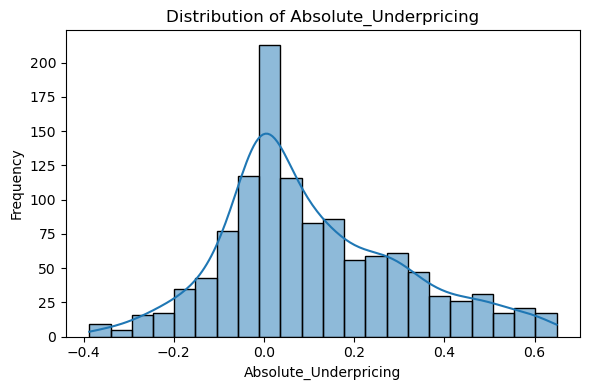

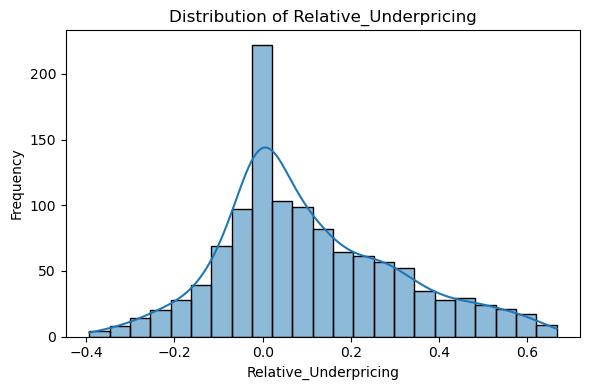

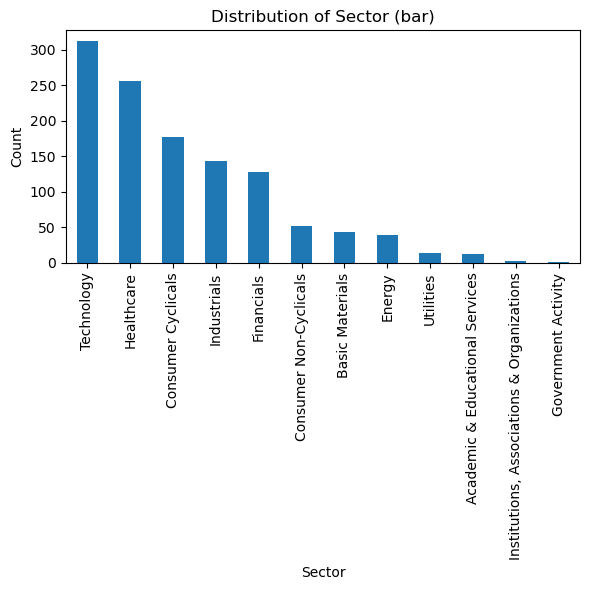

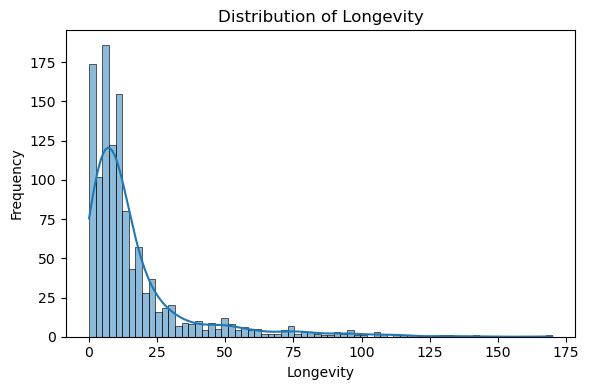

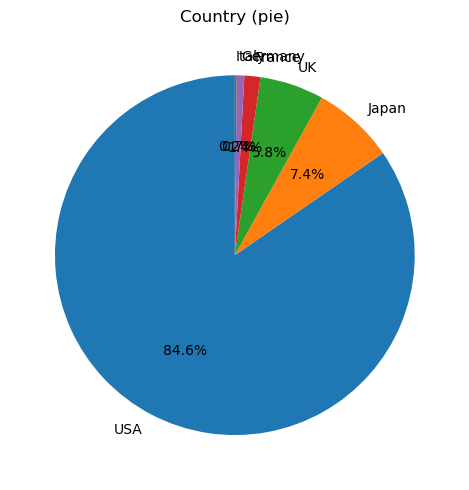

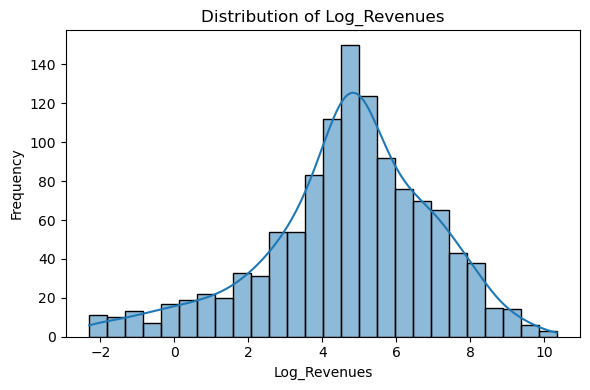

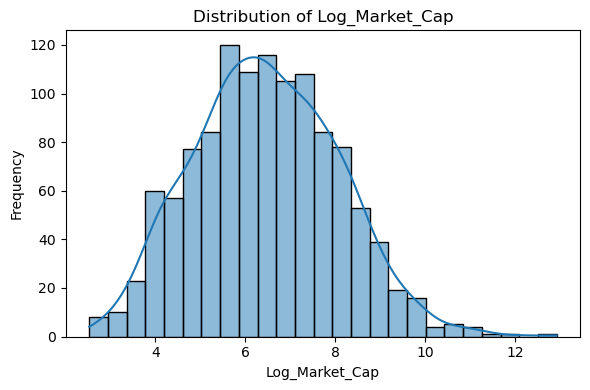

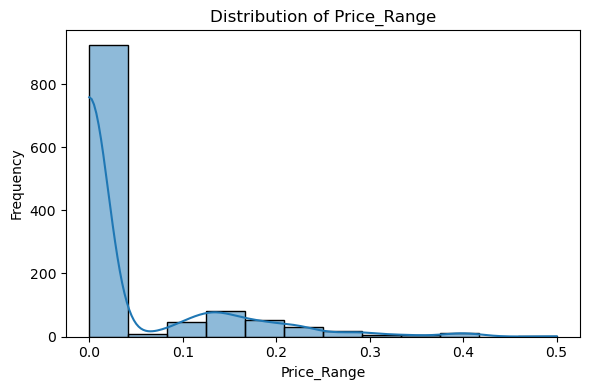

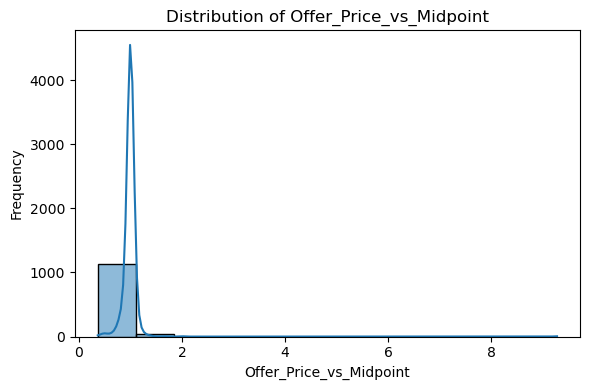

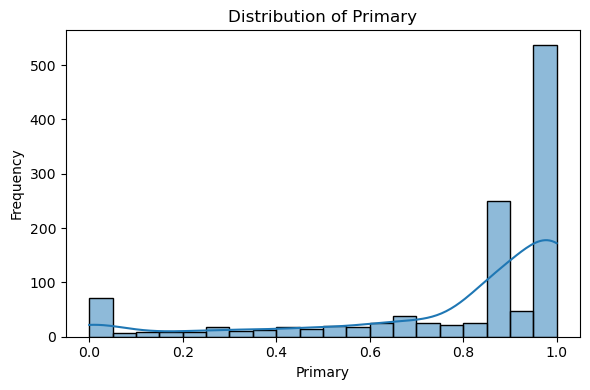

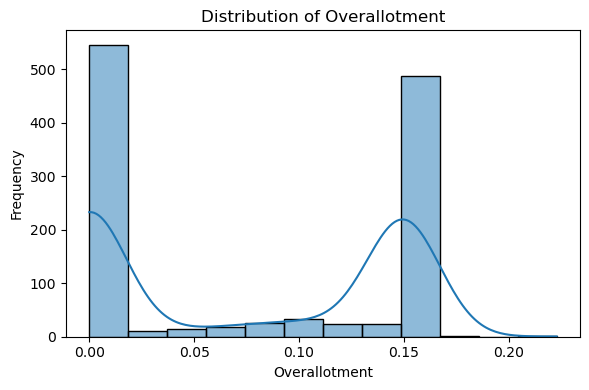

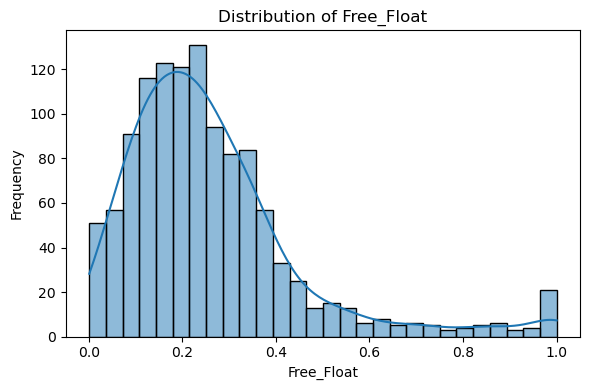

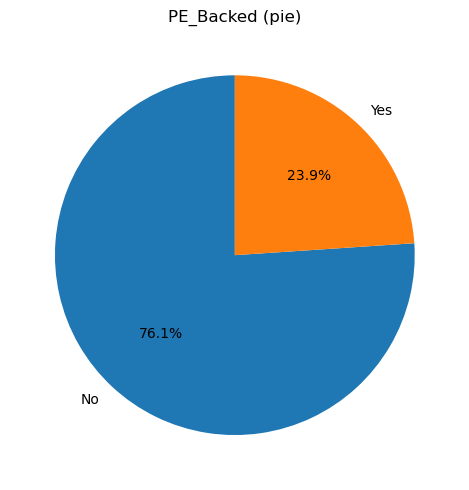

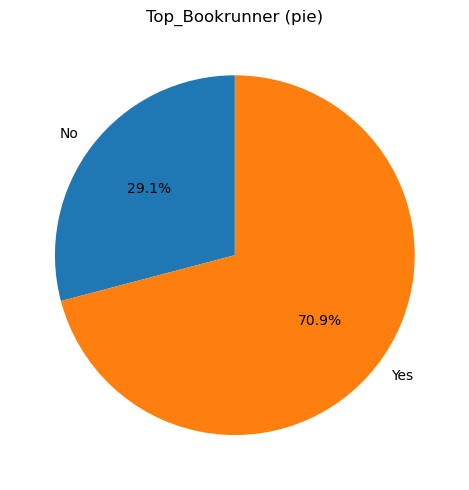

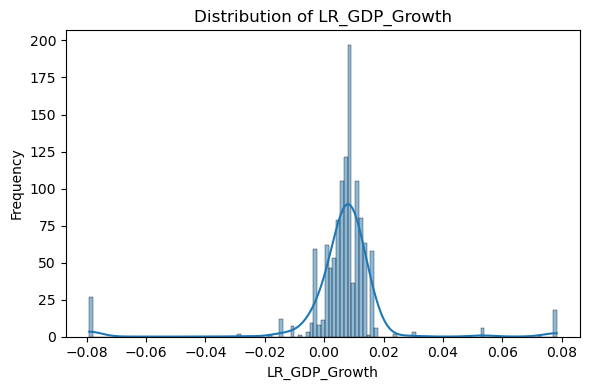

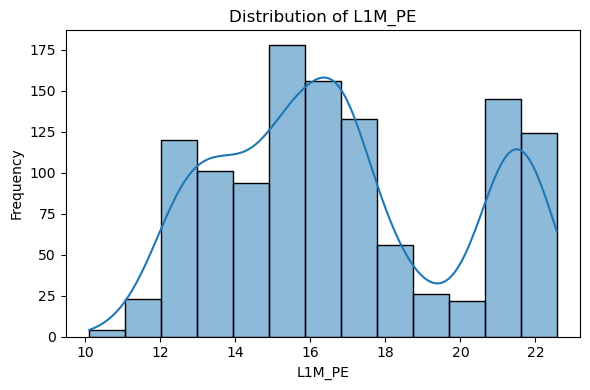

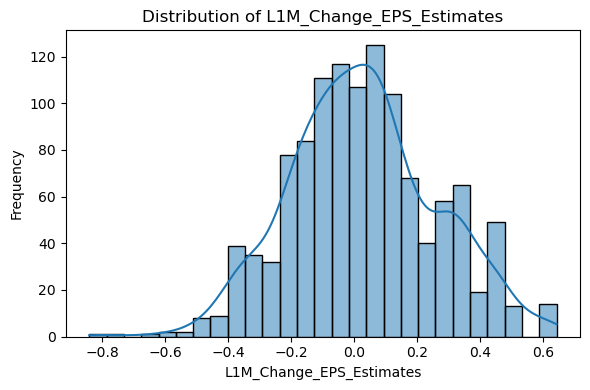

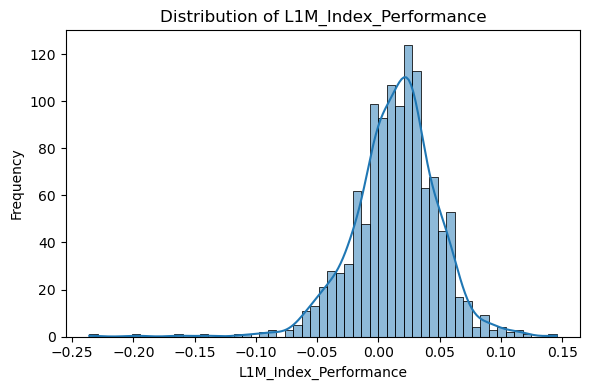

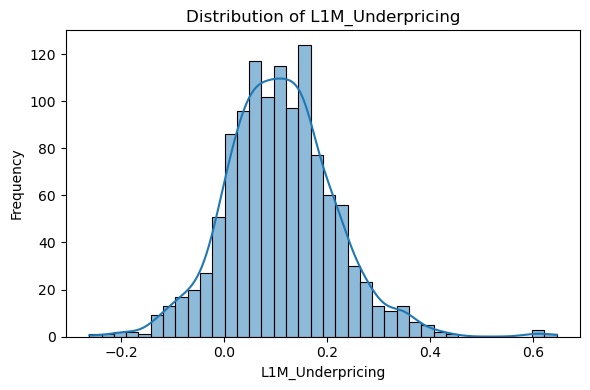

In [99]:
import seaborn as sns

flag_cols = ['PE_Backed', 'Top_Bookrunner']

for col in df_reg.columns:
    if col in ['ISIN', 'First_Trade_Date']:
        continue

    is_flag = (
        (col in flag_cols) or
        (pd.api.types.is_bool_dtype(df_reg[col])) or
        (df_reg[col].nunique(dropna=False) == 2)
    )

    if is_flag:
        vc = df_reg[col].value_counts(dropna=False).sort_index()

        if len(vc) == 2:
            vc.index = ['No', 'Yes']

        vc.plot.pie(
            autopct='%1.1f%%',
            startangle=90,
            figsize=(5, 5),
            title=f'{col} (pie)'
        )
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
        continue

    if pd.api.types.is_numeric_dtype(df_reg[col]):
        plt.figure(figsize=(6, 4))
        sns.histplot(df_reg[col].dropna(), kde=True, bins='auto')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col); plt.ylabel('Frequency')
        plt.tight_layout(); plt.show()
    
    else:
        vc = df_reg[col].value_counts(dropna=False)
        if len(vc) <= 10:
            vc.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(5, 5),
                        title=f'{col} (pie)')
            plt.ylabel('')
        else:
            vc.plot.bar(figsize=(6, 6), title=f'Distribution of {col} (bar)')
            plt.xlabel(col); plt.ylabel('Count')
        plt.tight_layout(); plt.show()


## Regression

##### OLS model

In [50]:
target_variable = 'Absolute_Underpricing'

independent_variables = [
    # Company-specific variables
    'Sector',
    'Longevity',
    'Country',
    'Log_Revenues',
    'Log_Market_Cap',
    # IPO-specific variables
    'Price_Range',
    'Offer_Price_vs_Midpoint',
    'Primary',
    'Overallotment',
    'Free_Float',
    'PE_Backed',
    'Top_Bookrunner',
    # Market sentiment variables
    'LR_GDP_Growth',
    'L1M_PE',
    'L1M_Change_EPS_Estimates',
    'L1M_Index_Performance',
    'L1M_Underpricing'
]

formula = f"{target_variable} ~ {' + '.join(independent_variables)}"

model_sm = smf.ols(formula=formula, data=df_reg)
results_sm = model_sm.fit()

print("\nStatsmodels Regression Results Summary:")
print(results_sm.summary())

print(f"\nRegression Coefficients:")
print(results_sm.params)
print(f"\nR-squared: {results_sm.rsquared:.4f}")


Statsmodels Regression Results Summary:
                              OLS Regression Results                             
Dep. Variable:     Absolute_Underpricing   R-squared:                       0.183
Model:                               OLS   Adj. R-squared:                  0.161
Method:                    Least Squares   F-statistic:                     8.325
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):           2.42e-33
Time:                           18:51:26   Log-Likelihood:                 337.01
No. Observations:                   1182   AIC:                            -610.0
Df Residuals:                       1150   BIC:                            -447.6
Df Model:                             31                                         
Covariance Type:               nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------

##### Verify the OLS assumptions

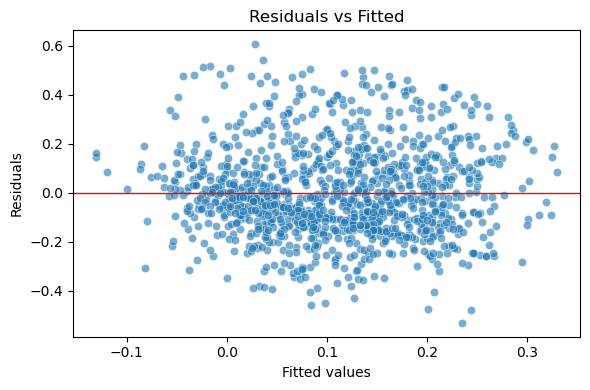

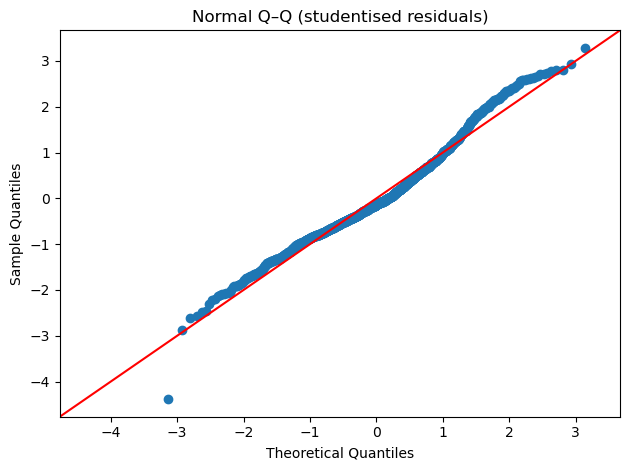

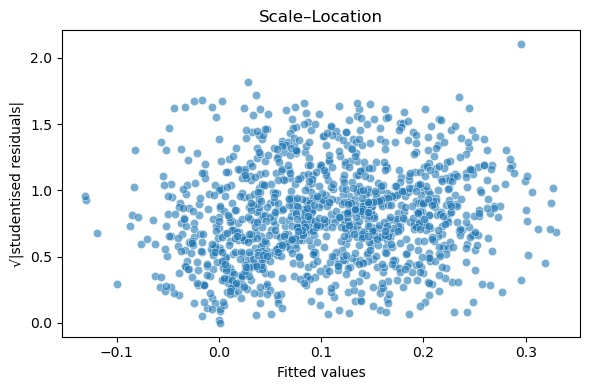

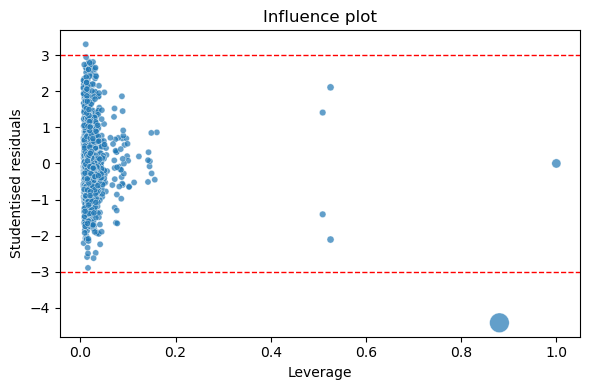


Breusch–Pagan p-value: 0.0000  (≤ 0.05 ⇒ heteroscedasticity suspected)
Rainbow linearity p-value: 0.9814  (≤ 0.05 ⇒ non-linearity suspected)
Durbin–Watson statistic: 1.88  (≈2 = no autocorr; <1 or >3 problematic)


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from statsmodels.stats.stattools import durbin_watson

# Extract residual diagnostics

fitted   = results_sm.fittedvalues
resid    = results_sm.resid
infl     = results_sm.get_influence()

std_res  = infl.resid_studentized_internal
cook     = infl.cooks_distance[0]
leverage = infl.hat_matrix_diag

# Build a finite-mask so all plots ignore NaN/inf points

finite = np.isfinite(std_res) & np.isfinite(fitted)

# Residuals vs Fitted

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted[finite], y=resid[finite], alpha=0.6)
plt.axhline(0, color='red', lw=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted"); plt.tight_layout(); plt.show()

# Normal Q–Q

sm.qqplot(std_res[finite], line='45', fit=True)
plt.title("Normal Q–Q (studentised residuals)"); plt.tight_layout(); plt.show()

# Scale–Location

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted[finite], y=np.sqrt(np.abs(std_res[finite])), alpha=0.6)
plt.xlabel("Fitted values"); plt.ylabel("√|studentised residuals|")
plt.title("Scale–Location"); plt.tight_layout(); plt.show()

# Influence plot

plt.figure(figsize=(6,4))
sns.scatterplot(x=leverage[finite], y=std_res[finite],
                size=cook[finite], sizes=(20,200),
                alpha=0.7, legend=False)
for y_val in (3, -3):
    plt.axhline(y=y_val, color='red', linestyle='--', lw=1)
plt.xlabel("Leverage"); plt.ylabel("Studentised residuals")
plt.title("Influence plot"); plt.tight_layout(); plt.show()

# Numerical tests

bp_p = het_breuschpagan(resid, results_sm.model.exog)[1]
rb_p = linear_rainbow(results_sm)[1]
dw   = durbin_watson(resid)

print(f"\nBreusch–Pagan p-value: {bp_p:.4f}  "
      "(≤ 0.05 ⇒ heteroscedasticity suspected)")
print(f"Rainbow linearity p-value: {rb_p:.4f}  "
      "(≤ 0.05 ⇒ non-linearity suspected)")
print(f"Durbin–Watson statistic: {dw:.2f}  "
      "(≈2 = no autocorr; <1 or >3 problematic)")


##### Model results excluding the high-leverage points

In [56]:
influence    = results_sm.get_influence()
leverage     = influence.hat_matrix_diag
cook_d       = influence.cooks_distance[0]

lev_cut  = 2*(results_sm.df_model + 1) / len(df_reg)

hi_mask  = leverage < lev_cut

df_robust = df_reg.loc[hi_mask].copy()

model_sm_robust = smf.ols(formula=formula, data=df_robust)
results_sm_robust = model_sm_robust.fit()

print("\nStatsmodels Regression Results Summary:")
print(results_sm_robust.summary())

print(f"\nRegression Coefficients:")
print(results_sm_robust.params)
print(f"\nR-squared: {results_sm_robust.rsquared:.4f}")


Statsmodels Regression Results Summary:
                              OLS Regression Results                             
Dep. Variable:     Absolute_Underpricing   R-squared:                       0.194
Model:                               OLS   Adj. R-squared:                  0.176
Method:                    Least Squares   F-statistic:                     10.96
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):           3.86e-37
Time:                           18:51:36   Log-Likelihood:                 316.49
No. Observations:                   1120   AIC:                            -583.0
Df Residuals:                       1095   BIC:                            -457.4
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------

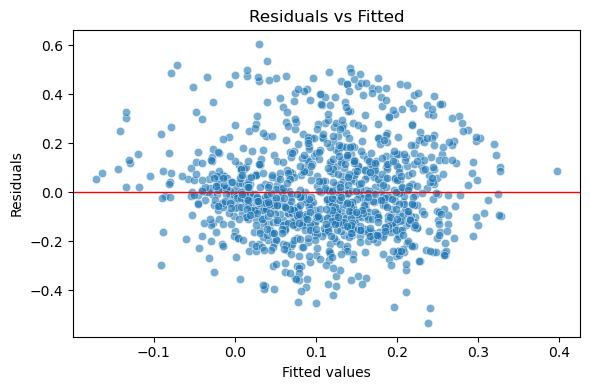

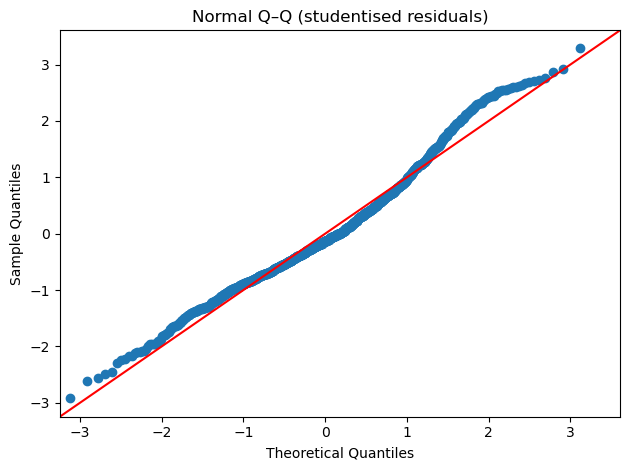

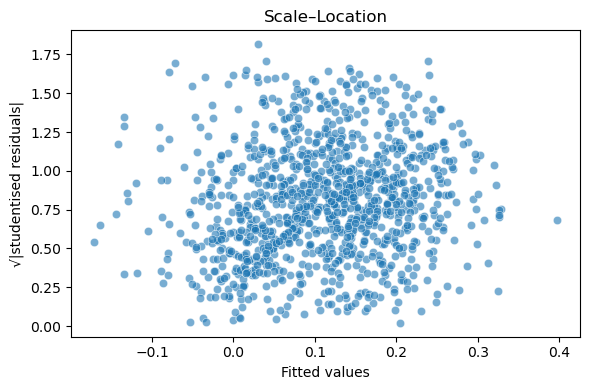

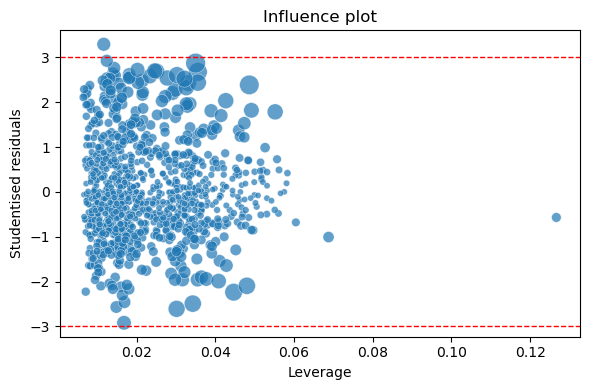


Breusch–Pagan p-value: 0.0000  (≤ 0.05 ⇒ heteroscedasticity suspected)
Rainbow linearity p-value: 0.9700  (≤ 0.05 ⇒ non-linearity suspected)
Durbin–Watson statistic: 1.88  (≈2 = no autocorr; <1 or >3 problematic)


In [58]:
# Extract residual diagnostics

fitted   = results_sm_robust.fittedvalues
resid    = results_sm_robust.resid
infl     = results_sm_robust.get_influence()

std_res  = infl.resid_studentized_internal
cook     = infl.cooks_distance[0]
leverage = infl.hat_matrix_diag

# Build a finite-mask so all plots ignore NaN/inf points

finite = np.isfinite(std_res) & np.isfinite(fitted)

# Residuals vs Fitted

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted[finite], y=resid[finite], alpha=0.6)
plt.axhline(0, color='red', lw=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted"); plt.tight_layout(); plt.show()

# Normal Q–Q

sm.qqplot(std_res[finite], line='45', fit=True)
plt.title("Normal Q–Q (studentised residuals)"); plt.tight_layout(); plt.show()

# Scale–Location

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted[finite], y=np.sqrt(np.abs(std_res[finite])), alpha=0.6)
plt.xlabel("Fitted values"); plt.ylabel("√|studentised residuals|")
plt.title("Scale–Location"); plt.tight_layout(); plt.show()

# Influence plot

plt.figure(figsize=(6,4))
sns.scatterplot(x=leverage[finite], y=std_res[finite],
                size=cook[finite], sizes=(20,200),
                alpha=0.7, legend=False)
for y_val in (3, -3):
    plt.axhline(y=y_val, color='red', linestyle='--', lw=1)
plt.xlabel("Leverage"); plt.ylabel("Studentised residuals")
plt.title("Influence plot"); plt.tight_layout(); plt.show()

# Numerical tests

bp_p = het_breuschpagan(resid, results_sm_robust.model.exog)[1]
rb_p = linear_rainbow(results_sm_robust)[1]
dw   = durbin_watson(resid)

print(f"\nBreusch–Pagan p-value: {bp_p:.4f}  "
      "(≤ 0.05 ⇒ heteroscedasticity suspected)")
print(f"Rainbow linearity p-value: {rb_p:.4f}  "
      "(≤ 0.05 ⇒ non-linearity suspected)")
print(f"Durbin–Watson statistic: {dw:.2f}  "
      "(≈2 = no autocorr; <1 or >3 problematic)")


##### Backward elimination

In [79]:
def backward_elimination(df, target, predictors, alpha=0.05, verbose=True):
   
    kept = predictors.copy()
    
    while True:
        X     = sm.add_constant(df[kept], has_constant='add')
        model = sm.OLS(df[target], X).fit()
        
        pvals      = model.pvalues.drop('const')
        worst_pval = pvals.max()
        worst_var  = pvals.idxmax()
        
        if worst_pval > alpha:
            if verbose:
                print(f"Dropping '{worst_var}' (p = {worst_pval:.4f})")
            kept.remove(worst_var)
            if not kept:
                raise RuntimeError("All predictors were eliminated.")
        else:
            break
    
    if verbose:
        print("Final variable set: ", kept)
        print(model.summary())
    return model, kept

# Select relevant columns from df_reg

target_variable = 'Absolute_Underpricing'

independent_variables = [
    # Company-specific variables
    'Sector',
    'Longevity',
    'Country',
    'Log_Revenues',
    'Log_Market_Cap',
    # IPO-specific variables
    'Price_Range',
    'Offer_Price_vs_Midpoint',
    'Primary',
    'Overallotment',
    'Free_Float',
    'PE_Backed',
    'Top_Bookrunner',
    # Market sentiment variables
    'LR_GDP_Growth',
    'L1M_PE',
    'L1M_Change_EPS_Estimates',
    'L1M_Index_Performance',
    'L1M_Underpricing'
]

df_subset = df_reg[[target_variable] + independent_variables].copy()

# One-hot encode multi-level categoricals

df_enc = pd.get_dummies(
    df_subset,
    columns=['Sector', 'Country'],
    drop_first=True
)

# Convert non-numeric variables

df_enc['PE_Backed'] = (
    df_enc['PE_Backed']
      .replace({True: 1, False: 0, 'True': 1, 'False': 0})
      .astype(int)
)

bool_cols = df_enc.select_dtypes('bool').columns
df_enc[bool_cols] = df_enc[bool_cols].astype(int)

# Run backward elimination on the encoded DataFrame

initial_predictors = [col for col in df_enc.columns if col != target_variable]

final_model, final_vars = backward_elimination(
    df        = df_enc,
    target    = target_variable,
    predictors= initial_predictors,
    alpha     = 0.05,
    verbose   = True
)

Dropping 'Country_UK' (p = 0.9482)
Dropping 'Longevity' (p = 0.9102)
Dropping 'Free_Float' (p = 0.8309)
Dropping 'Country_Germany' (p = 0.8176)
Dropping 'Primary' (p = 0.6496)
Dropping 'Sector_Institutions, Associations & Organizations' (p = 0.6272)
Dropping 'Sector_Utilities' (p = 0.5673)
Dropping 'LR_GDP_Growth' (p = 0.4018)
Dropping 'Sector_Government Activity' (p = 0.3815)
Dropping 'Sector_Academic & Educational Services' (p = 0.3752)
Dropping 'Country_Italy' (p = 0.2187)
Dropping 'L1M_Change_EPS_Estimates' (p = 0.2006)
Dropping 'Price_Range' (p = 0.1586)
Dropping 'Offer_Price_vs_Midpoint' (p = 0.1112)
Dropping 'Sector_Consumer Non-Cyclicals' (p = 0.1070)
Dropping 'Sector_Consumer Cyclicals' (p = 0.1812)
Dropping 'Sector_Financials' (p = 0.2583)
Dropping 'Sector_Healthcare' (p = 0.2234)
Dropping 'Sector_Industrials' (p = 0.2873)
Dropping 'Sector_Basic Materials' (p = 0.1295)
Dropping 'Country_France' (p = 0.0958)
Dropping 'Sector_Energy' (p = 0.0738)
Dropping 'Country_Japan' (p = 0

C:\Users\Luca Delorenzi\AppData\Local\Temp\ipykernel_8076\313151107.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({True: 1, False: 0, 'True': 1, 'False': 0})


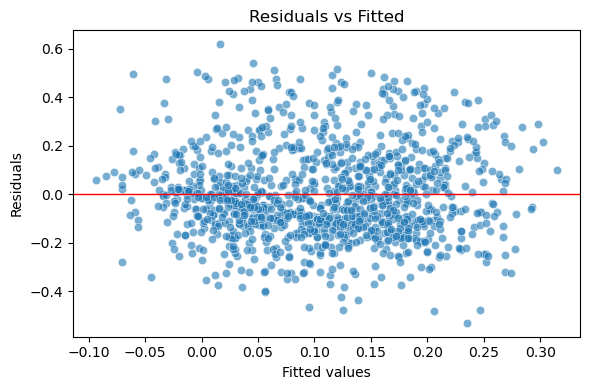

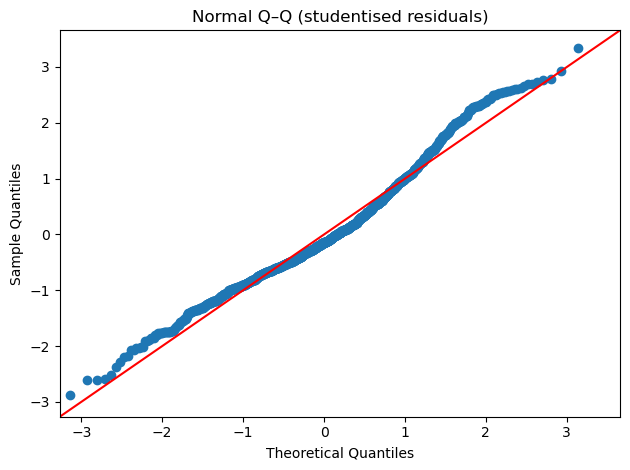

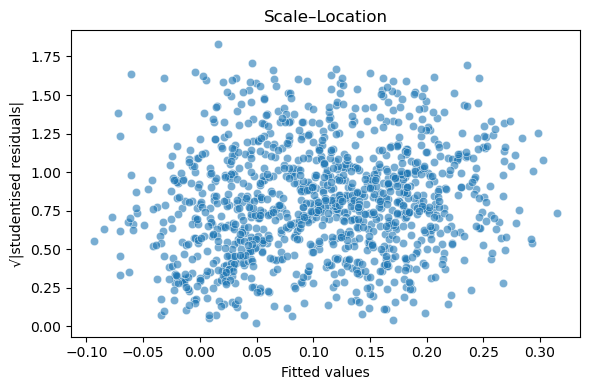

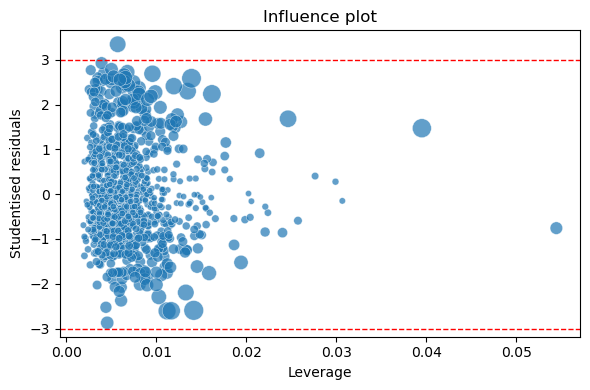


Breusch–Pagan p-value: 0.0000  (≤ 0.05 ⇒ heteroscedasticity suspected)
Rainbow linearity p-value: 0.9881  (≤ 0.05 ⇒ non-linearity suspected)
Durbin–Watson statistic: 1.90  (≈2 = no autocorr; <1 or >3 problematic)


In [81]:
# Extract residual diagnostics

fitted   = final_model.fittedvalues
resid    = final_model.resid
infl     = final_model.get_influence()

std_res  = infl.resid_studentized_internal
cook     = infl.cooks_distance[0]
leverage = infl.hat_matrix_diag

# Build a finite-mask so all plots ignore NaN/inf points

finite = np.isfinite(std_res) & np.isfinite(fitted)

# Residuals vs Fitted

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted[finite], y=resid[finite], alpha=0.6)
plt.axhline(0, color='red', lw=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted"); plt.tight_layout(); plt.show()

# Normal Q–Q

sm.qqplot(std_res[finite], line='45', fit=True)
plt.title("Normal Q–Q (studentised residuals)"); plt.tight_layout(); plt.show()

# Scale–Location

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted[finite], y=np.sqrt(np.abs(std_res[finite])), alpha=0.6)
plt.xlabel("Fitted values"); plt.ylabel("√|studentised residuals|")
plt.title("Scale–Location"); plt.tight_layout(); plt.show()

# Influence plot

plt.figure(figsize=(6,4))
sns.scatterplot(x=leverage[finite], y=std_res[finite],
                size=cook[finite], sizes=(20,200),
                alpha=0.7, legend=False)
for y_val in (3, -3):
    plt.axhline(y=y_val, color='red', linestyle='--', lw=1)
plt.xlabel("Leverage"); plt.ylabel("Studentised residuals")
plt.title("Influence plot"); plt.tight_layout(); plt.show()

# Numerical tests

bp_p = het_breuschpagan(resid, final_model.model.exog)[1]
rb_p = linear_rainbow(final_model)[1]
dw   = durbin_watson(resid)

print(f"\nBreusch–Pagan p-value: {bp_p:.4f}  "
      "(≤ 0.05 ⇒ heteroscedasticity suspected)")
print(f"Rainbow linearity p-value: {rb_p:.4f}  "
      "(≤ 0.05 ⇒ non-linearity suspected)")
print(f"Durbin–Watson statistic: {dw:.2f}  "
      "(≈2 = no autocorr; <1 or >3 problematic)")
